# Modelado

## Preámbulo



In [1]:
!pip install --quiet mglearn
#
# paquetes estandar de Python
#
import os
# 
# paquetes estandar para computación científica
# 
import matplotlib as mpl 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng
import pandas as pd
#
# paquete del libro Muller & Guido
#
import mglearn
#
# configuración por defecto para gráficas
#
mpl.rcParams['figure.dpi']  = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size']        = 10
mpl.rcParams['legend.fontsize']  = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'



     |████████████████████████████████| 540 kB 8.4 MB/s 


## Desempeño en regresión

En general, el error en regresión es la suma de los errores o _residuos_ en cada una de las salidas o _respuestas_ a aproximar.

Si tenemos respuestas conocidas $y[j]$, datos $x[j,1],x[j,2],\ldots,x[j,m]$, y residuos y una aproximación o predicción $\hat{y}[j] = f(x[j,:])$, podemos calcular $e[j] = y[j] - f(x[j,:]).$

Sin embargo, queda algo por definir, y es cómo ponderar cada error. Típicamente se considera el error cuadrático, es decir, 
$$r(y[j],\hat{y}[j]) = e[j]^2.$$
Eso es lo que hemos usado hasta ahora. El problema con el error cuadrático es que es muy sensible a _outliers_ (datos atípicamente alejados del resto). Veamos qué pasa:


----------------------------------
error cuadrático medio (MSE): 0.1
error absoluto medio   (MAD): 0.3
----------------------------------

----------------------------------
error cuadrático medio (MSE): 2.76
error absoluto medio   (MAD): 0.93
----------------------------------



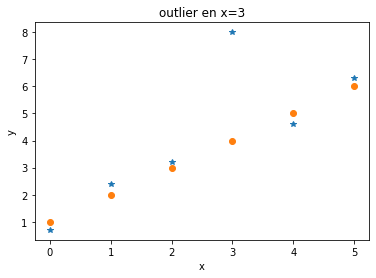

----------------------------------
aumento relativo (MSE): 2752.0 %
aumento relativo (MAD): 211.0 %
----------------------------------



In [2]:

#
# sin outliers
#
y  = np.array([0.7, 2.4, 3.2, 4.2, 4.6, 6.3])
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
e  = y - y1
R2 = np.mean(e**2)      # error cuadrático medio
R1 = np.mean(np.abs(e)) # error absoluto medio
print('----------------------------------')
print('error cuadrático medio (MSE):',np.round(R2,2))
print('error absoluto medio   (MAD):',np.round(R1,2))
print('----------------------------------\n')
#
# con outliers: dato en x=3 es un "outlier"
#
y[3]  = 8.0
e  = y - y1
R2o = np.mean(e**2)      # error cuadrático medio
R1o = np.mean(np.abs(e)) # error absoluto medio
print('----------------------------------')
print('error cuadrático medio (MSE):',np.round(R2o,2))
print('error absoluto medio   (MAD):',np.round(R1o,2))
print('----------------------------------\n')

plt.plot(y,'*')
plt.plot(y1,'o')
plt.title('outlier en x=3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('----------------------------------')
print('aumento relativo (MSE):',np.round(100*(R2o-R2)/R2,0),'%')
print('aumento relativo (MAD):',np.round(100*(R1o-R1)/R1,0),'%')
print('----------------------------------\n')


### Moraleja

Si sabemos  que los datos tienen outliers, usar el MSE suele ser mala idea.
Por otro lado, el MAD es menos sensible a errores grandes debidos al modelado.
En última instancia, **es necesario conocer el problema** para elegir la medida correcta.
Esto se aplica a todo el resto de este práctico.

---

**Ejercicio de taller**

Busque en Internet información sobre  _Robust Statistics_

---



## Problemas de detección

Se trata de problemas en donde el objetivo es detectar la presencia de un evento en base a un conjunto de datos. Es un problema muy común en muchas áreas, desde las telecomunicaciones (detección de señales de radio, por ejemplo) a medicina (detección de tumores malignos), a seguridad (detección de fraudes, intrusiones, etc.).

La detección suele expresarse como un problema de dos clases: la clase _positiva_, correspondiente a la existencia del evento a detectar, y la clase _negativa_, indicando ausencia del evento. 

Siendo problemas muy importantes, existen numerosas formas de medir el desempeño de los sistemas. Esto deriva en numerosas (y confusas) definiciones de métricas y scores.

Finalmente, un aspecto importante en este tipo de problemas es el _desbalance_. Esto se da cuando el evento a detectar es _raro_. Un ejemplo típico de esto ocurre en el análisis de frandes, donde la enorme mayoría de las transacciones son legítimas y los fraudes son muy pocos. 

A continuación ilustraremos las distintas medidas de desempeño en escenarios sintéticos. 


In [5]:
rng.seed(565)
ndatos = 1000                   # cantidad de datos
ppos   = .05                     # probabilidad de evento 
y      = 1*(rng.rand(ndatos) < ppos) # eventos muestreados al azar
npos   = np.sum(y)              # cantidad de positivos
nneg   = ndatos - npos               # cantidad de negativos
print(f'datos totales {ndatos} positivos {npos} negativos {nneg}')
#
# detección: siempre negativo 
#
y_pesimista = np.zeros(ndatos)
y_optimista = np.ones(ndatos)
y_marchanta = rng.rand(ndatos) > 0.5 # decisión al azar
y_perfecto  = y

decisiones = {'pesimista':y_pesimista,
              'optimista':y_optimista,
              'marchanta':y_marchanta,
              'perfecto':y_perfecto}
print('-'*120)
print()
for nombre in decisiones.keys():
  y_pred = decisiones[nombre]
  TP = np.sum(np.logical_and(y,y_pred))
  TN = np.sum(np.logical_and(np.logical_not(y),np.logical_not(y_pred)))
  FP = np.sum(np.logical_and(np.logical_not(y),y_pred))
  FN = np.sum(np.logical_and(y,np.logical_not(y_pred)))
  #
  # primer set de scores
  #
  precision = TP / (TP + FP)
  recall    = TP / (TP + FN)
  f_score   = 2*(precision*recall)/(precision+recall)
  print(f'{nombre:9}: TP {TP:6d} TN {TN:6d} FP {FP:6d} FN {FN:6d} PRE {precision:.2f} REC {recall:.2f} F-1 {f_score:.2f}',end=' | ')
  #
  # segundo set de scores
  #
  TPR = recall
  FPR = FP / (FP + TN)
  ACC = (TP+TN) / (TP+TN+FP+FN)
  print(f'ACCURACY {ACC:.2f} TPR {TPR:.2f} FPR {FPR:.2f}')
print()
print('-'*120)


datos totales 1000 positivos 52 negativos 948
------------------------------------------------------------------------------------------------------------------------

pesimista: TP      0 TN    948 FP      0 FN     52 PRE nan REC 0.00 F-1 nan | ACCURACY 0.95 TPR 0.00 FPR 0.00
optimista: TP     52 TN      0 FP    948 FN      0 PRE 0.05 REC 1.00 F-1 0.10 | ACCURACY 0.05 TPR 1.00 FPR 1.00
marchanta: TP     28 TN    466 FP    482 FN     24 PRE 0.05 REC 0.54 F-1 0.10 | ACCURACY 0.49 TPR 0.54 FPR 0.51
perfecto : TP     52 TN    948 FP      0 FN      0 PRE 1.00 REC 1.00 F-1 1.00 | ACCURACY 1.00 TPR 1.00 FPR 0.00

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


---

**Ejercicio**

Repita la celda anterior variando la probabilidad de un evento positivo (ppos)

---


## ROC y punto de operación 

Los problemas de decisión suelen tener otra particularidad: equivocarse para un lado o para el otro _no tiene el mismo impacto_.

Obviamente, es mucho peor diagnosticar como benigno un tumor maligno, que viceversa.

Sin embargo, tampoco es muy bueno declarar que todos los tumores son malignos para cubrirse, sobre todo si eso implica realizar un tratamiento invasivo, que también tiene riesgos de vida no despreciables (ej., quimioterapia, radioterapia y/o cirugía).

Cada decisión tiene un costo, y el balance óptimo es en última instancia una decisión humana. Desde el punto de vista de quien desarrolla un sistema de detección, lo mejor es dar toda la gama de posibilidades y que quien toma las decisiones pueda elegir el _punto de operación_ que resulte en el mejor balance según sus criterios.

La curva ROC nos permite expresar los posibles balances en términos de TPR y FPR. Veamos un ejemplo para un nuevo ejemplo sintético inspirado en un problema típico de telecomunicaciones.

## Enviar datos por cable

Supongamos que queremos enviar una señal de alarma por un cable eléctrico. Normalmente, en ausencia de alarma, el voltaje del cable será $0$ voltios. Cuando se produce una alarma, el cable se pone a $5$ voltios.

Desafortunadamente las lineas de transmisión eléctricas tienen ruido, imperfecciones y pérdidas de energía a lo largo del camino. Esto hace que el voltaje que mide el receptor no va a ser nunca exactamente $5$V, sino algo aproximado.

Para decidir si en un momento dado hay alarma, el receptor mide el voltaje recibido (llamémosle $x$) y lo compara con un cierto umbral $u$. Si $x > u$, decimos que hubo alarma ($\hat{y}=1$) si no, declaramos $\hat{y}=0$.
Se presenta entonces el escenario mencionado anteriormente: si elegimos un umbral $u$ demasiado bajo, vamos a tener muchas falsas alarmas (falsos positivos). Si elegimos un umbral demasiado alto, no detectamos nunca nada.


datos totales 5000 positivos 1008 negativos 3992


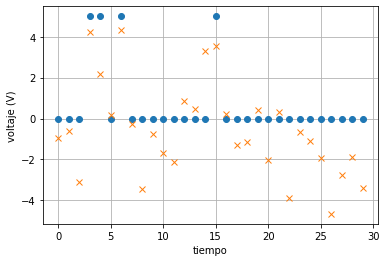

In [6]:
rng.seed(565)
ndatos = 5000                   # cantidad de datos
ppos   = .2                     # probabilidad de evento 
y      = 1*(rng.rand(ndatos) < ppos) # eventos muestreados al azar
npos   = np.sum(y)              # cantidad de positivos
nneg   = ndatos - npos               # cantidad de negativos
print(f'datos totales {ndatos} positivos {npos} negativos {nneg}')
#
# generamos señal observada x
# el ruido es Gaussiano, de media nula y desviación 1V
#
x = 5*y + 2*rng.randn(ndatos)
plt.plot(5*y[:30],'o')
plt.plot(x[:30],'x')
plt.grid(True)
plt.xlabel('tiempo')
plt.ylabel('voltaje (V)')
plt.show()


## Visualización

Abajo mostramos la distribución empírica de los valores de $x$ para los dos casos $y=1$ (alarma)  e $y=0$ (no alarma).


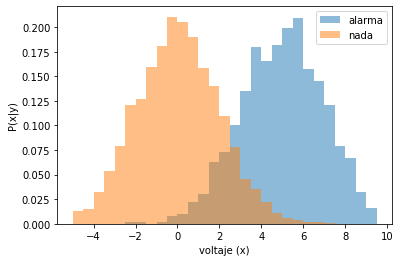

In [7]:
#
# veamos la distribución empírica de la señal x en cada caso
# - cuando hay alarma
# - cuando no hay alarma
#
bins = np.arange(-5.0,10.0,0.5)
plt.hist(x[y == 1], bins=bins, density=True, alpha=0.5,label='alarma')
plt.hist(x[y == 0], bins=bins, density=True, alpha=0.5,label='nada')
plt.xlabel('voltaje (x)')
plt.ylabel('P(x|y)')
plt.legend()
#
#
# veamos qué obtenemos con el umbral de 2.5V
#
u = 2.5
y_pred = x > 2.5
TP = np.sum(np.logical_and(y,y_pred))

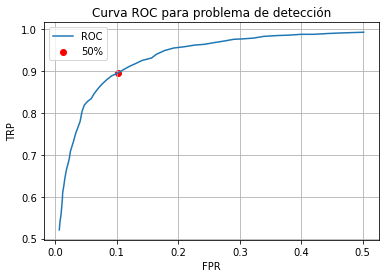

In [8]:



us = np.arange(0,5.1,step=0.1) # umbrales a probar entre 0 y 5 de a pasos de 0.1
tpr = np.empty(len(us))
fpr = np.empty(len(us))
for i,u in enumerate(us):
  y_pred = x > u
  tp = np.sum(np.logical_and(y,y_pred)) # dijimos si correctamente
  fn = np.sum(np.logical_and(y,np.logical_not(y_pred))) # dijimos no cuando era si
  fp = np.sum(np.logical_and(np.logical_not(y),y_pred))
  tn = np.sum(np.logical_and(np.logical_not(y),np.logical_not(y_pred)))
  tpr[i] = tp / (tp + fn)
  fpr[i] = fp / (fp + tn)
#
# dibujamos la ROC
# estos son todos los pares (FPR,TPR) para cada valor de u
#
plt.plot(fpr,tpr,label='ROC')
#
# pintamos el punto en donde u = 2.5V, la mitad entre 0 y 5V
#
medio = len(tpr)//2
plt.scatter([fpr[medio]],[tpr[medio]],label='50%',c='red')
plt.xlabel('FPR')
plt.ylabel('TRP')
plt.title('Curva ROC para problema de detección')
plt.legend()
plt.grid(True)


---

** Preguntas **

*   Qué FPR (a ojo) se obtiene si se exige un TRP de 95%?
*   Qué TPR (a ojo)) se obtiene si queremos controlar los FPR por debajo del 5%?
*   Cuál es el accuracy en cada uno de los tres casos? 
   * punto medio pintado en rojo
   * TPR 95%
   * FPR  5%
---
   

## Problemas de clasificación generales (multi-clase)

Cuando hay más de dos clases y/o se trata de un problema de clasificación común en donde no hay una clase especial, algunas de las medidias que vimos no tienen sentido. 

Podemos sin embargo definir TP, FP, TN y FN de manera relativa a cada clase. De esa manera, TP(c) indica la cantidad de veces que imputamos correctamente la clase c, FP(c) las veces que lo hicimos incorrectamente, etc.

De la misma manera podemos definir _precision_, _recall_ y _f-score_ en relación a cada clase.

De todos modos, suele ser más informativo y claro representar el desempeño en términos de la llamada _matriz de confusión_. Esta es una tabla en donde se registran todos los posibles eventos de detección: la celda en la columna $j$ y fila $i$ indica la cantidad de veces que imputamos $j$ cuando la clase correcta era $i$. De esta manera, los aciertos están todos en la diagonal, y los errores en las celdas fuera de la diagonal. 

Para ilustrar este concepto vamos a tomar el ejemplo del libro, que utiliza los datos de clasificación de dígitos manuscritos mencionados anteriormente.




In [10]:
#
# nota: en el libro falta importar confusion_matrix y classification_report
#
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
#
# cargamos problema de ejemplo
# 
digits = load_digits()
#
# dividimos en entrenamiento y test...
#
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
#
# creamos y ajustamos modelo (en la misma linea)
#
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
#
# imputamos clases
#
y_pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))
#
# la función classification_report da más detalles sobre el desempeño
# en particular nos reporta el precision, report y el f1-score para cada clase (fila)
# (support es la cantidad de ocurrencias totales de la clase correspondiente)
#
print('\n-----------------------------------------------------------')
print('REPORTE')
print('-----------------------------------------------------------')
print(classification_report(y_test,y_pred))
print('-----------------------------------------------------------')


Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]

-----------------------------------------------------------
REPORTE
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       